# LSA - News Classification

Project 1 - Linear Algebra (Spring 1403) - Dr. Sarafraz

ECE - University of Tehran

Designed by:
[Erfan Asgari](https://github.com/erfanasgari21),
[Fardin Abbasi](https://github.com/fardinabbasi)

In [1]:
!pip install kaggle


## Download the Dataset

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''
!kaggle datasets download -d tanishqdublish/text-classification-documentation

Dataset URL: https://www.kaggle.com/datasets/tanishqdublish/text-classification-documentation
License(s): apache-2.0
  0% 0.00/1.85M [00:00<?, ?B/s]
100% 1.85M/1.85M [00:00<00:00, 93.8MB/s]


In [3]:
import zipfile

with zipfile.ZipFile("text-classification-documentation.zip", 'r') as zip_ref:
    zip_ref.extractall("text_classification")


In [4]:
import pandas as pd
file_path = 'text_classification/df_file.csv'
df = pd.read_csv(file_path)

In [5]:
import re

# Function to cleanse text
def cleanse_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and unwanted characters (including newline characters)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\n', ' ', text)  # Replace newline characters with space
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = text.strip()  # Remove leading and trailing spaces
    return text

df['Text'] = df['Text'].apply(cleanse_text)

## Visualization

### Table Summary

In [6]:
df.head()

,Text,Label
0,budget to set scene for election gordon brown ...,0
1,army chiefs in regiments decision military chi...,0
2,howard denies split over id cards michael howa...,0
3,observers to monitor uk election ministers wil...,0
4,kilroy names election seat target exchat show ...,0


### Labels Frequency

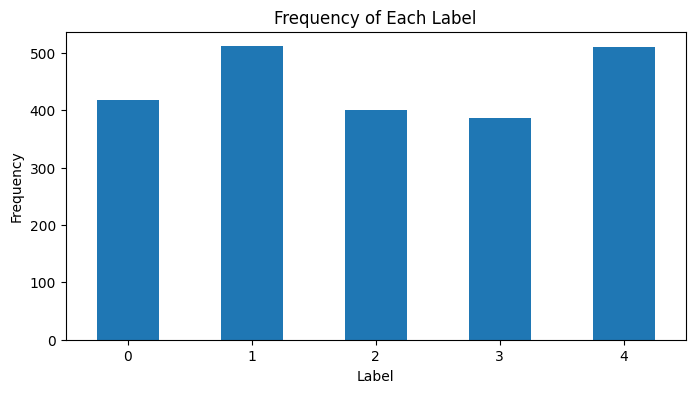

In [8]:
import matplotlib.pyplot as plt

label_frequency = df['Label'].value_counts()

plt.figure(figsize=(8, 4))
label_frequency.sort_index().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Frequency of Each Label')
plt.xticks(rotation=0)
plt.show()


### Word Cloud

In [9]:
!pip install wordcloud

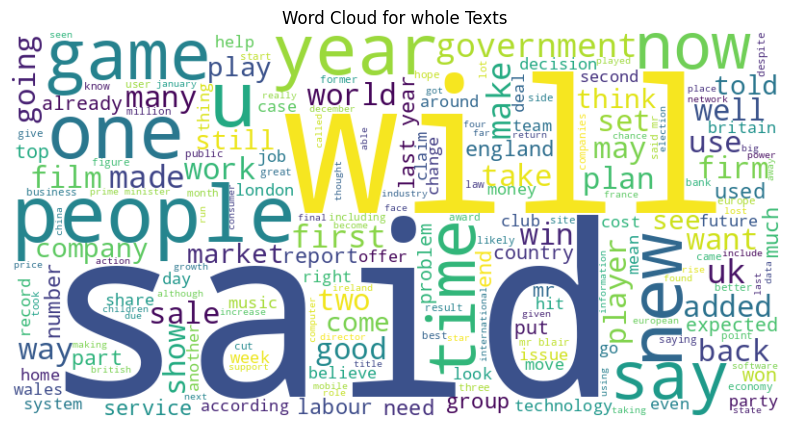

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

text = " ".join(df['Text'])
generate_word_cloud(text, f'Word Cloud for whole Texts')

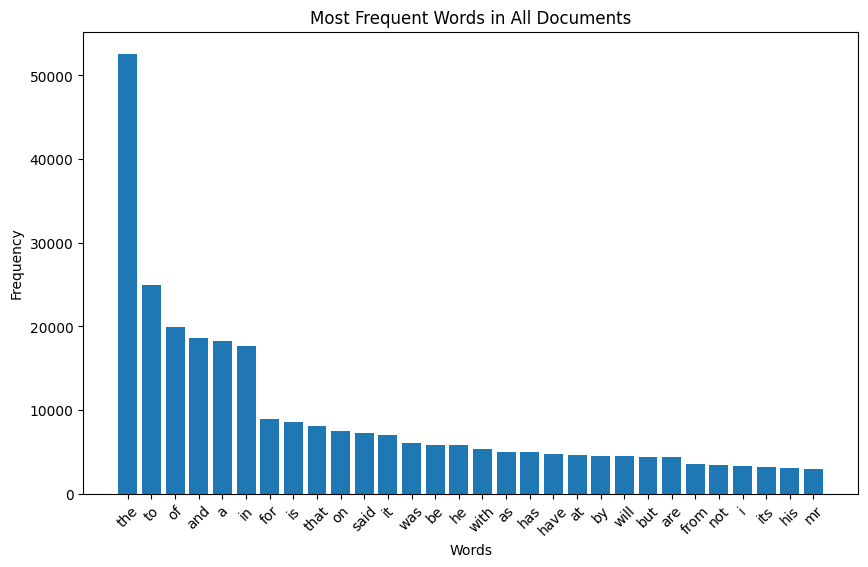

In [11]:
import matplotlib.pyplot as plt
from collections import Counter
import string
import re


all_text = " ".join(df['Text'])

all_text = all_text.lower()  # Convert to lowercase
all_text = re.sub(f"[{string.punctuation}]", " ", all_text)  # Remove punctuation
words = all_text.split()

word_counts = Counter(words)

most_common_words = word_counts.most_common(30)  # Adjust the number to show more or fewer words

words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Words in All Documents')
plt.xticks(rotation=45)
plt.show()


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
documents = df['Text'].str.lower().str.replace(f"[{string.punctuation}]", " ", regex=True)

# Vectorize the text data using the bag-of-words model and apply TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=150)
X = vectorizer.fit_transform(documents)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()
print("Top 100 important words:")
print(feature_names)

Top 100 important words:
['10' '2003' '2004' '2005' 'according' 'action' 'added' 'bank' 'bbc'
 'best' 'better' 'big' 'blair' 'britain' 'british' 'brown' 'business'
 'came' 'campaign' 'chief' 'club' 'come' 'companies' 'company' 'country'
 'court' 'data' 'day' 'deal' 'decision' 'despite' 'did' 'digital'
 'director' 'dont' 'economic' 'economy' 'election' 'end' 'england'
 'europe' 'european' 'expected' 'far' 'figures' 'film' 'final' 'firm'
 'firms' 'future' 'game' 'games' 'general' 'going' 'good' 'got'
 'government' 'great' 'group' 'growth' 'help' 'high' 'hit' 'home' 'howard'
 'im' 'including' 'industry' 'information' 'international' 'just' 'know'
 'labour' 'law' 'life' 'like' 'likely' 'london' 'make' 'market' 'media'
 'million' 'minister' 'mobile' 'money' 'month' 'months' 'mr' 'music'
 'need' 'net' 'new' 'news' 'number' 'office' 'online' 'open' 'party'
 'people' 'phone' 'place' 'plans' 'play' 'players' 'prime' 'public'
 'radio' 'real' 'really' 'record' 'report' 'right' 'said' 'sales' 'say

In [ ]:
important_words = pd.read_csv("words.csv").squeeze().tolist()

## Bag of Words

In [ ]:
import pandas as pd

def count_words(text):
    word_count = {word: 0 for word in important_words}
    for word in text.split():
        if word in word_count:
            word_count[word] += 1
    return word_count

df['Word_Counts'] = df['Text'].apply(count_words)

word_counts_df = pd.DataFrame(df['Word_Counts'].tolist(), index=df.index)

word_counts_df

,artist,chief,china,club,company,computer,country,deal,digital,director,...,sale,service,tax,technology,time,uk,user,win,won,work
0,0,1,0,0,0,0,0,0,0,0,...,0,0,6,0,2,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,3,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,1,0,0,3,0,0,0,0,0,...,3,0,3,0,0,0,0,0,0,0
2222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2223,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
word_counts_df.describe()

,artist,chief,china,club,company,computer,country,deal,digital,director,...,sale,service,tax,technology,time,uk,user,win,won,work
count,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,...,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000
mean,0.023820,0.202697,0.105618,0.152360,0.277753,0.141573,0.170337,0.192360,0.186517,0.191461,...,0.107416,0.200899,0.181573,0.248539,0.515506,0.430562,0.023820,0.272809,0.238652,0.270562
std,0.209635,0.552782,0.769290,0.799997,0.757560,0.676695,0.600675,0.699971,0.940112,0.677370,...,0.493359,0.806114,1.042411,1.006623,0.996332,1.086113,0.209635,0.824372,0.768734,0.772481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,7.000000,13.000000,12.000000,7.000000,8.000000,8.000000,8.000000,17.000000,19.000000,...,7.000000,13.000000,14.000000,12.000000,20.000000,12.000000,4.000000,13.000000,12.000000,15.000000


## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
word_counts_scaled = scaler.fit_transform(word_counts_df)

## Truncated SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_components = 7
svd = TruncatedSVD(n_components=n_components)
lsi_matrix = svd.fit_transform(word_counts_scaled)

TruncatedSVD(n_components=52)

## Visualize Word Embeddings

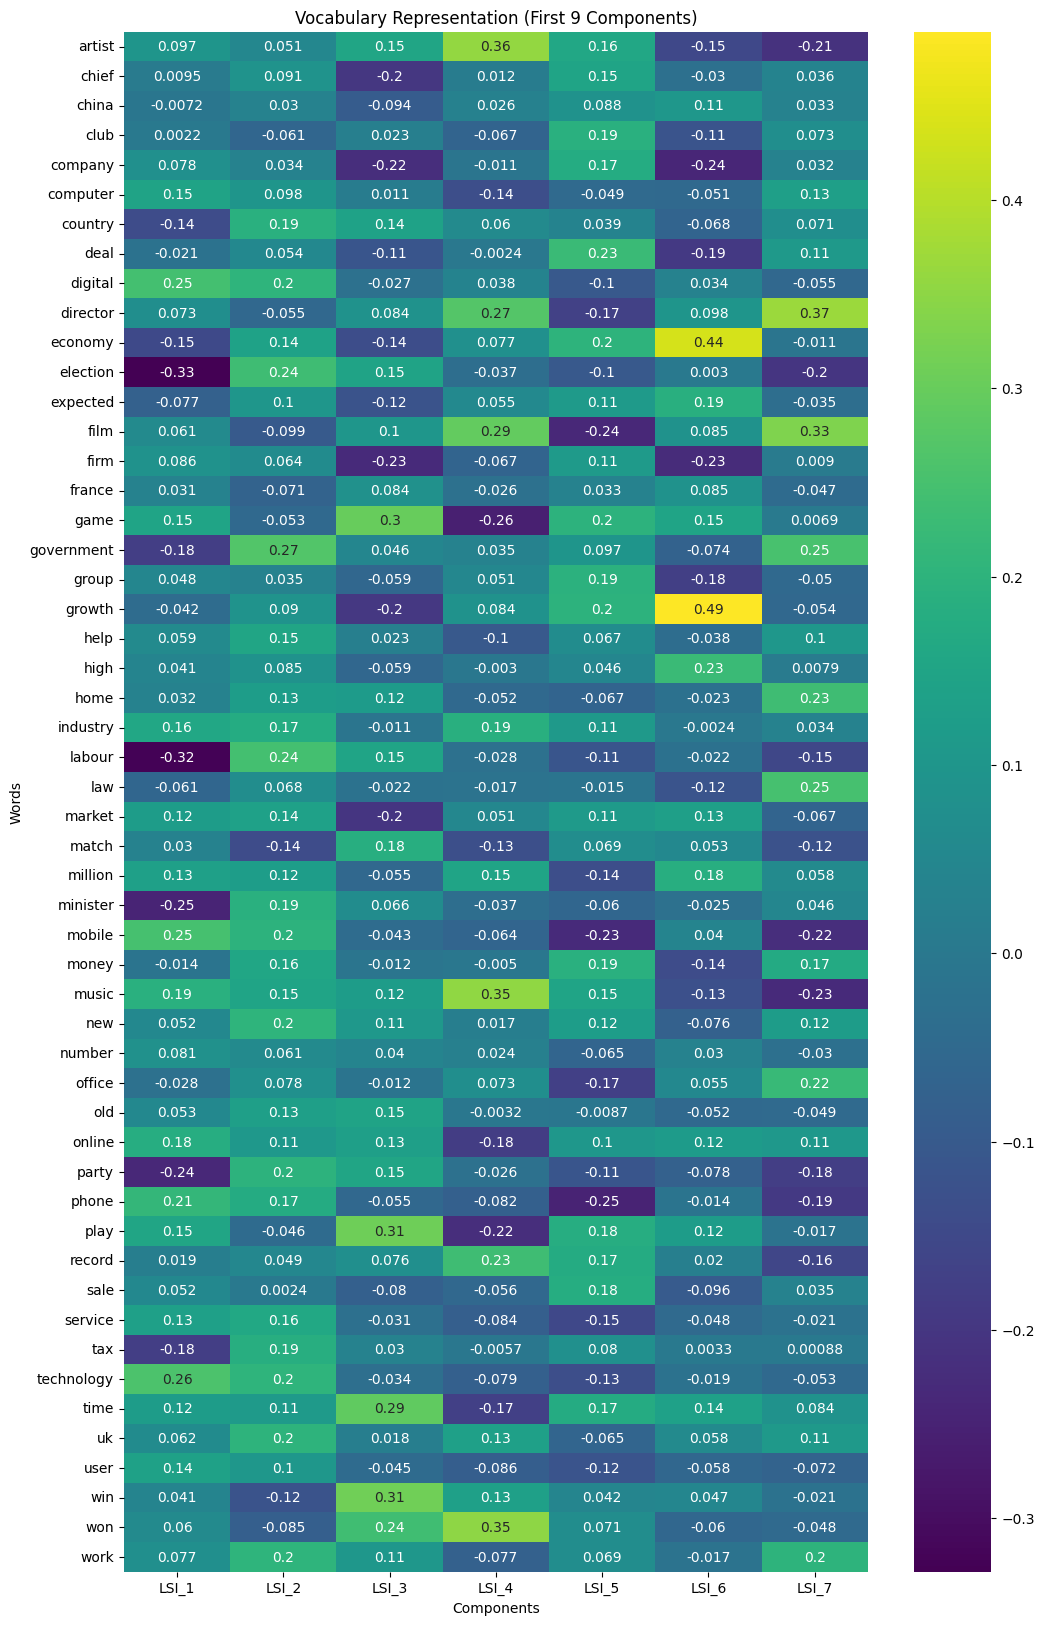

In [ ]:

import seaborn as sns

# Convert the LSI matrix to a DataFrame for easier interpretation
lsi_df = pd.DataFrame(lsi_matrix, columns=[f'LSI_{i+1}' for i in range(n_components)])

def plot_heatmap(data, title):
    plt.figure(figsize=(12, 20))
    sns.heatmap(data, annot=True, cmap='viridis')
    plt.title(title)
    plt.xlabel('Components')
    plt.ylabel('Words')
    plt.show()


vocab_representation = svd.components_.T  # Shape: (num_words, n_components)

vocab_df_7 = pd.DataFrame(vocab_representation[:, :7], index=important_words, columns=[f'LSI_{i+1}' for i in range(7)])

plot_heatmap(vocab_df_7, 'Vocabulary Representation (First 9 Components)')

## Intuition of each component (concept)

In [ ]:
# Find the 10 words with the strongest values for each component
top_words = {}
for i in range(n_components):
    component_loadings = vocab_representation[:, i]
    top_indices = abs(component_loadings).argsort()[-10:][::-1]  # Get indices of top 10 values
    top_words[f'Component_{i+1}'] = [(important_words[idx], component_loadings[idx]) for idx in top_indices]

# Print the top 10 words and their values for each component
for component, words in top_words.items():
    print(f"{component}:")
    for word, value in words:
        print(f"  {word}: {value:.4f}")


Component_1:
  election: -0.3283
  labour: -0.3230
  technology: 0.2571
  mobile: 0.2484
  minister: -0.2473
  digital: 0.2455
  party: -0.2364
  phone: 0.2132
  music: 0.1910
  online: 0.1813
Component_2:
  government: 0.2684
  labour: 0.2443
  election: 0.2366
  digital: 0.2047
  work: 0.2042
  technology: 0.2033
  new: 0.2033
  uk: 0.2007
  mobile: 0.1982
  party: 0.1982
Component_3:
  win: 0.3112
  play: 0.3074
  game: 0.3004
  time: 0.2910
  won: 0.2378
  firm: -0.2304
  company: -0.2217
  market: -0.2020
  chief: -0.1982
  growth: -0.1973
Component_4:
  artist: 0.3576
  music: 0.3539
  won: 0.3510
  film: 0.2931
  director: 0.2690
  game: -0.2575
  record: 0.2341
  play: -0.2226
  industry: 0.1868
  online: -0.1831
Component_5:
  phone: -0.2515
  film: -0.2388
  mobile: -0.2307
  deal: 0.2267
  economy: 0.1998
  growth: 0.1969
  game: 0.1967
  group: 0.1946
  club: 0.1909
  money: 0.1900
Component_6:
  growth: 0.4893
  economy: 0.4354
  company: -0.2391
  high: 0.2270
  firm: -0.

## Labels in terms of concepts

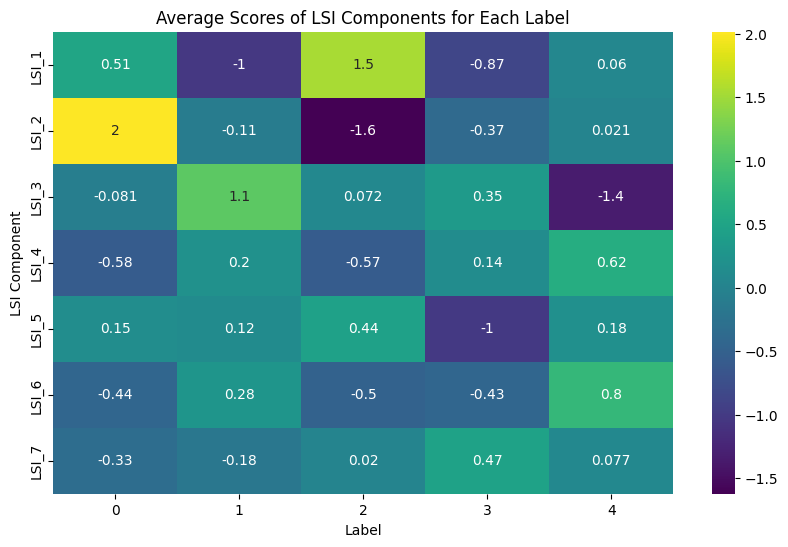

In [ ]:
# Add the labels to the LSI DataFrame
lsi_df['Label'] = df['Label']

# Group by the label and calculate the average score of each component for each label
avg_scores = lsi_df.groupby('Label').mean()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(avg_scores.T, annot=True, cmap='viridis')
plt.title('Average Scores of LSI Components for Each Label')
plt.xlabel('Label')
plt.ylabel('LSI Component')
plt.show()

# Querying
To find the most relevant documents to a single word.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

def find_relevant_documents(word, df, important_words):

    if word not in important_words:
        print(f"The word '{word}' is not in the vocabulary.")
        return None

    word_index = important_words.index(word)

    word_representation = svd.components_.T[word_index]

    cosine_similarities = cosine_similarity([word_representation], df)

    cosine_similarities = cosine_similarities.flatten()

    result_df = pd.DataFrame({'Document_Index': df.index, 'Cosine_Similarity': cosine_similarities})

    result_df = result_df.sort_values(by='Cosine_Similarity', ascending=False)

    relevant_indices = result_df['Document_Index'].tolist()

    return relevant_indices, cosine_similarities


word = 'game'
relevant_indices, _ = find_relevant_documents(word,  lsi_df.drop(columns=['Label']), important_words)

relevant_texts = df.loc[relevant_indices[:10]]
relevant_texts


,Text,Label,Word_Counts,Cosine_Similarity
1086,Blinx sequel purrs nicely\n \n The original Bl...,2,"{'chief': 0, 'company': 0, 'country': 0, 'part...",0.108305
945,Halo fans' hope for sequel\n \n Xbox video gam...,2,"{'chief': 0, 'company': 0, 'country': 0, 'part...",0.101513
956,No half measures with Half-Life 2\n \n Could H...,2,"{'chief': 0, 'company': 0, 'country': 0, 'part...",0.115635
1094,Ban hits Half-Life 2 pirates hard\n \n About 2...,2,"{'chief': 0, 'company': 2, 'country': 0, 'part...",0.203114
1250,Big war games battle it out\n \n The arrival o...,2,"{'chief': 0, 'company': 0, 'country': 0, 'part...",0.049627
...,...,...,...,...
525,Benitez delight after crucial win\n \n Liverpo...,1,"{'chief': 0, 'company': 0, 'country': 1, 'part...",-0.365956
826,Dawson set for new Wasps contract\n \n Europea...,1,"{'chief': 0, 'company': 0, 'country': 0, 'part...",-0.256254
565,Bellamy under new fire\n \n Newcastle boss Gra...,1,"{'chief': 0, 'company': 0, 'country': 0, 'part...",-0.348102
645,Wenger dejected as Arsenal slump\n \n Arsenal ...,1,"{'chief': 0, 'company': 0, 'country': 0, 'part...",-0.013725


## Similarity between words and labels

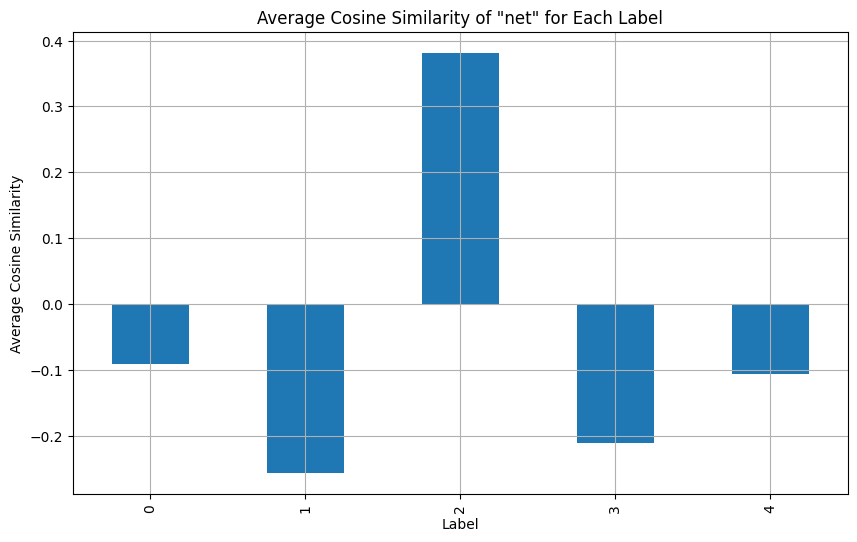

In [ ]:
word = 'net'
relevant_indices, cosine_similarities = find_relevant_documents(word, lsi_df.drop(columns=['Label']), important_words)

df['Cosine_Similarity'] = cosine_similarities

average_cosine_similarity_per_label = df.groupby('Label')['Cosine_Similarity'].mean()

plt.figure(figsize=(10, 6))
average_cosine_similarity_per_label.plot(kind='bar')
plt.title(f'Average Cosine Similarity of "{word}" for Each Label')
plt.xlabel('Label')
plt.ylabel('Average Cosine Similarity')
plt.grid(True)
plt.show()

## Similarity between documents and words

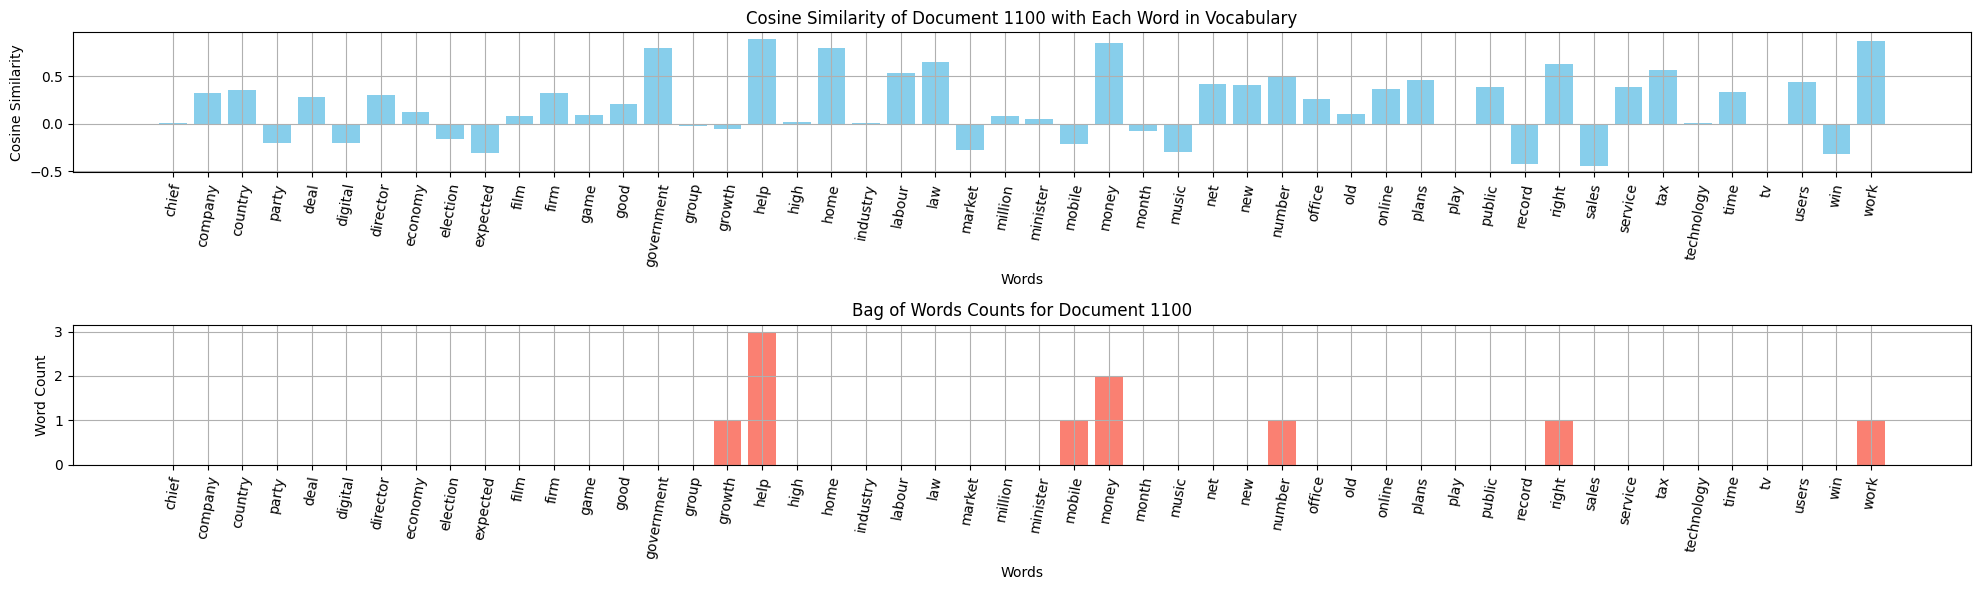

In [ ]:
import matplotlib.pyplot as plt

def document_similarity_with_words(doc_index, df, important_words):
    doc_representation = lsi_matrix[doc_index]

    # Calculate cosine similarity between the document representation and each word representation
    word_similarities = {}
    for word in important_words:
        word_index = important_words.index(word)
        word_representation = svd.components_.T[word_index]
        similarity = cosine_similarity([doc_representation], [word_representation])[0][0]
        word_similarities[word] = similarity

    return word_similarities



doc_index = 1100
similarities = document_similarity_with_words(doc_index, lsi_df.drop(columns=['Label']), important_words)


words = list(similarities.keys())
cosine_sim_values = list(similarities.values())

word_counts = df['Word_Counts'].iloc[doc_index]

plt.figure(figsize=(20, 6))

plt.subplot(2, 1, 1)
plt.bar(words, cosine_sim_values, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Cosine Similarity')
plt.title(f'Cosine Similarity of Document {doc_index} with Each Word in Vocabulary')
plt.xticks(rotation=80)
plt.grid(True)

plt.subplot(2, 1, 2)
plt.bar(word_counts.keys(), word_counts.values(), color='salmon')
plt.xlabel('Words')
plt.ylabel('Word Count')
plt.title(f'Bag of Words Counts for Document {doc_index}')
plt.xticks(rotation=80)
plt.grid(True)

plt.tight_layout()
plt.show()


## Classification

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def label_alignment_scores(document_latent_vector, lsi_df):
    # Calculate cosine similarity between the document's latent vector and each label's average concept vector
    label_scores = {}
    for label in lsi_df['Label'].unique():

        label_documents = lsi_df[lsi_df['Label'] == label].drop(columns=['Label'])

        average_latent_vector = label_documents.mean(axis=0)

        similarity_score = cosine_similarity([document_latent_vector], [average_latent_vector])[0][0]

        label_scores[label] = similarity_score

    return label_scores


document_latent_vector = lsi_matrix[1280]
alignment_scores = label_alignment_scores(document_latent_vector, lsi_df)

print("Alignment Scores:")
for label, score in alignment_scores.items():
    print(f"Label {label}: {score}")


Alignment Scores:
Label 0: -0.392401165423547
Label 1: -0.24106854046862372
Label 2: 0.8589690911952138
Label 3: -0.11464534916646166
Label 4: -0.2626894819288656


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

def word_similarity(word1, word2, df, important_words):

    # Find the index of the word in the vocabulary
    word1_index = important_words.index(word1)
    word2_index = important_words.index(word2)

    # Extract the LSI representation for the word
    word1_representation = svd.components_.T[word1_index]
    word2_representation = svd.components_.T[word2_index]

    # Calculate cosine similarity between word representation and document representations
    cosine_similarities = cosine_similarity([word1_representation], [word2_representation])
    euclidean_distance = euclidean_distances([word1_representation], [word2_representation])

    return cosine_similarities, euclidean_distance

print(word_similarity("mobile", "technology", lsi_df, important_words))
print(word_similarity("director", "film", lsi_df, important_words))
print(word_similarity("new", "old", lsi_df, important_words))
print(word_similarity("play", "game", lsi_df, important_words))
print(word_similarity("play", "law", lsi_df, important_words))
print(word_similarity("tv", "time", lsi_df, important_words))


(array([[0.96300072]]), array([[0.10267747]]))
(array([[0.95120451]]), array([[0.18767276]]))
(array([[0.62181769]]), array([[0.25656454]]))
(array([[0.98159757]]), array([[0.0924259]]))
(array([[-0.27660517]]), array([[0.59675164]]))
(array([[0.]]), array([[0.42958768]]))
